                                                    1. ANÁLISE EXPLORATÓRIA DOS DADOS

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#carregando a base de dados
df = pd.read_csv('desafio_indicium_imdb.csv')

#vendo o tamanho da base (número de linhas e colunas)
df.shape

(999, 16)

In [77]:
#Resumo das informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


-> As colunas 'Certificate', 'Meta_score' e 'Gross' contêm valores nulos

In [78]:
percentual_faltantes = (df.isnull().sum() / len(df['Series_Title'])) * 100

percentual_faltantes

Unnamed: 0        0.000000
Series_Title      0.000000
Released_Year     0.000000
Certificate      10.110110
Runtime           0.000000
Genre             0.000000
IMDB_Rating       0.000000
Overview          0.000000
Meta_score       15.715716
Director          0.000000
Star1             0.000000
Star2             0.000000
Star3             0.000000
Star4             0.000000
No_of_Votes       0.000000
Gross            16.916917
dtype: float64

Limpeza e adequação dos dados

In [79]:
#Alternativa 1: excluir todos os dados faltantes
df = df.dropna()

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 996
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     713 non-null    int64  
 1   Series_Title   713 non-null    object 
 2   Released_Year  713 non-null    object 
 3   Certificate    713 non-null    object 
 4   Runtime        713 non-null    object 
 5   Genre          713 non-null    object 
 6   IMDB_Rating    713 non-null    float64
 7   Overview       713 non-null    object 
 8   Meta_score     713 non-null    float64
 9   Director       713 non-null    object 
 10  Star1          713 non-null    object 
 11  Star2          713 non-null    object 
 12  Star3          713 non-null    object 
 13  Star4          713 non-null    object 
 14  No_of_Votes    713 non-null    int64  
 15  Gross          713 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 94.7+ KB


In [80]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'R', 'G', 'PG-13', 'PG', 'Passed', 'Approved',
       'TV-PG', 'U/A', 'GP'], dtype=object)

In [81]:
def agupando_classEtaria(rotuloClassificacao):
    if rotuloClassificacao in ['U', 'G', 'Passed', 'Approved']:
        return 'Free'  # livre para todos os públicos
    elif rotuloClassificacao in ['PG', 'TV-PG', 'U/A', 'GP']:
        return '<13 years watch with parents'  #  menores de 13 anos assisitr com os pais
    elif rotuloClassificacao in ['PG-13']:
        return '>=13'  # a partir de 13 anos
    elif rotuloClassificacao in ['R']:
        return '<17 years watch with parents'  # menores de 17 anos assistir com os pais
    else:
        return 'Adult' # A -> apenas para adultos

df['Certificate'] = df['Certificate'].apply(agupando_classEtaria)


In [82]:
# Coluna Gross -> removendo as vírgulas e transformando os dados em números
df['Gross'] = df['Gross'].str.replace(',','')
df['Gross'] = pd.to_numeric(df['Gross'])

# Coluna Runtime -> removendo a palavra 'min' e transformando os dados em números
df['Runtime'] = df['Runtime'].str.replace('min','').astype('Int64')

# Coluna Series_Title, Overview-> convertendo para string
df['Series_Title'] = df['Series_Title'].astype(str)
df['Overview'] = df['Overview'].astype(str)

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')

#verificando o tipo transformado
print(df.info())
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 996
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     713 non-null    int64  
 1   Series_Title   713 non-null    object 
 2   Released_Year  712 non-null    Int64  
 3   Certificate    713 non-null    object 
 4   Runtime        713 non-null    Int64  
 5   Genre          713 non-null    object 
 6   IMDB_Rating    713 non-null    float64
 7   Overview       713 non-null    object 
 8   Meta_score     713 non-null    float64
 9   Director       713 non-null    object 
 10  Star1          713 non-null    object 
 11  Star2          713 non-null    object 
 12  Star3          713 non-null    object 
 13  Star4          713 non-null    object 
 14  No_of_Votes    713 non-null    int64  
 15  Gross          713 non-null    int64  
dtypes: Int64(2), float64(2), int64(3), object(9)
memory usage: 96.1+ KB
None
(713, 16)


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,Adult,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
1,2,The Dark Knight,2008,Adult,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
2,3,The Godfather: Part II,1974,Adult,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
3,4,12 Angry Men,1957,Free,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
4,5,The Lord of the Rings: The Return of the King,2003,Free,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905


In [83]:
df.describe()

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,713.000000,712.0,713.0,713.000000,713.000000,7.130000e+02,7.130000e+02
mean,519.300140,1995.738764,123.690042,7.935203,77.154278,3.533480e+05,7.858395e+07
std,295.416331,18.611182,25.896632,0.288999,12.409392,3.462212e+05,1.150433e+08
min,1.000000,1930.0,72.0,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,263.000000,1986.75,104.0,7.700000,70.000000,9.582600e+04,6.153939e+06
50%,527.000000,2001.0,120.0,7.900000,78.000000,2.363110e+05,3.500000e+07
75%,778.000000,2010.0,136.0,8.100000,86.000000,5.059180e+05,1.025158e+08
max,997.000000,2019.0,238.0,9.200000,100.000000,2.303232e+06,9.366622e+08


Observando a disposição dos gêneros

In [84]:
import re
from collections import Counter

delimitadores = r"[,\s]+" #separar tanto por espaço quanto por vírgula

qtd_por_genero = Counter(re.split(delimitadores, " ".join(df['Genre'])))

qtd_por_genero

Counter({'Drama': 499,
         'Adventure': 163,
         'Comedy': 161,
         'Crime': 142,
         'Action': 140,
         'Thriller': 99,
         'Biography': 88,
         'Romance': 88,
         'Mystery': 70,
         'Animation': 63,
         'Sci-Fi': 56,
         'Fantasy': 55,
         'Family': 43,
         'History': 38,
         'War': 29,
         'Music': 27,
         'Horror': 18,
         'Sport': 17,
         'Western': 16,
         'Musical': 11,
         'Film-Noir': 6})

 -> Dos 21 gêneros, os 3 mais presentes são Drama,Aventura e Comédia. Já os 3 que menos aparecem são: Faroeste, Musical e Noir.

-> É possível observar a relevância de cada um de forma visual, como através da nuvem de palavras abaixo:

In [85]:
#pip install wordcloud

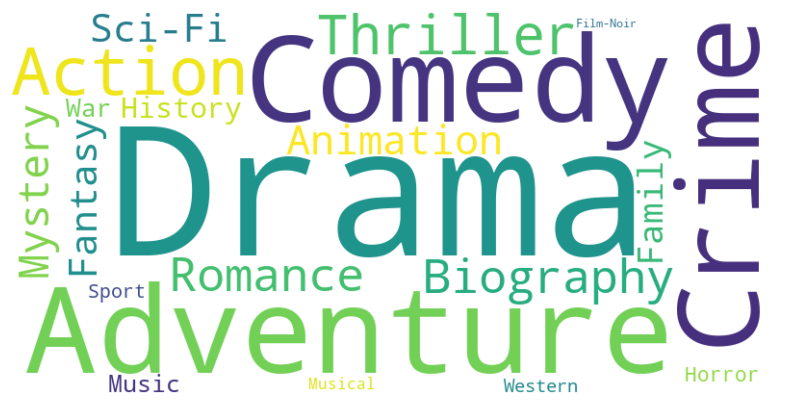

In [86]:
from wordcloud import WordCloud

# Gerar a nuvem de palavras usando a contagem de gêneros
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(qtd_por_genero)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Calculando a nota média dos filmes (Imdb_Rating ou Meta_score) de acordo com o gênero

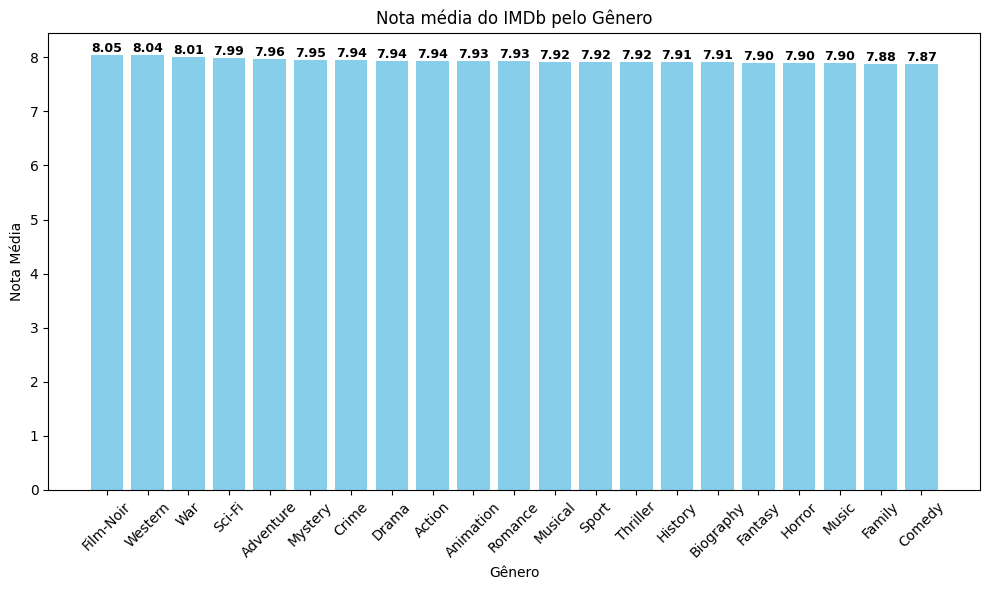

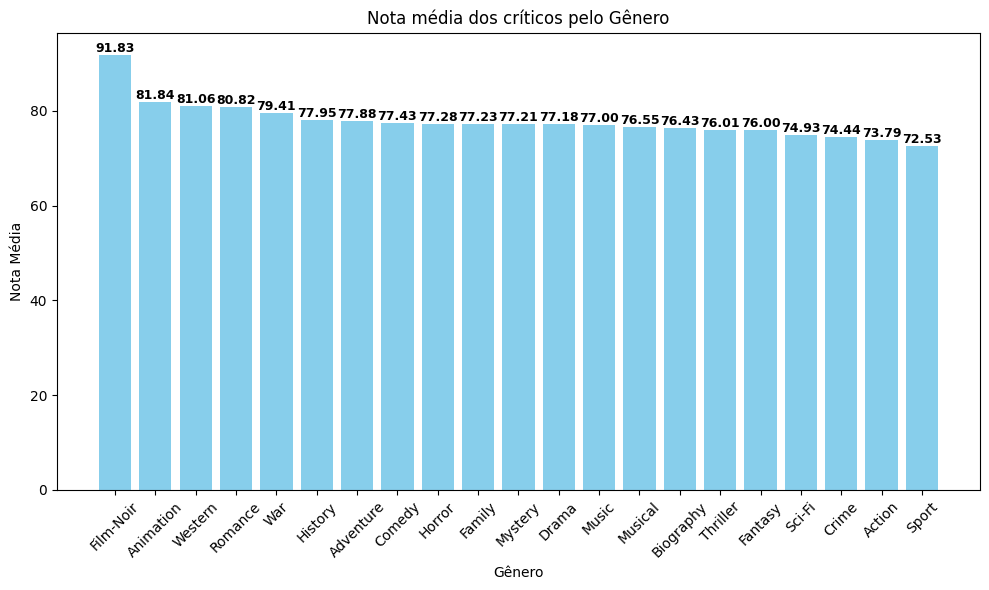

In [87]:
from collections import defaultdict

def plotNotaMediaPeloGenero(dataSet, colunaNotas, tituloGrafico):
    soma_notas = defaultdict(float)
    
    for _, row in df.iterrows():
        generos = re.split(delimitadores, row['Genre'])
        for genero in generos:
            soma_notas[genero] += row[colunaNotas]
        
    media_notas_por_genero = {genero: soma_notas[genero] / qtd_por_genero[genero] for genero in qtd_por_genero}

    generos_ordenados = sorted(media_notas_por_genero, key=media_notas_por_genero.get, reverse=True)

    generos = []
    medias = []
        
    for genero in generos_ordenados:
        generos.append(genero)
        medias.append(media_notas_por_genero[genero])
            
    plt.figure(figsize=(10, 6))
    bars = plt.bar(generos, medias, color='skyblue')
    plt.xlabel('Gênero')
    plt.ylabel('Nota Média')
    plt.title(tituloGrafico)
    plt.xticks(rotation=45)
    
    # texto com a média em cima de cada barra
    for bar, media in zip(bars, medias):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{media:.2f}', 
                 ha='center', va='bottom', fontsize=9, color='black', weight='bold')
    
    plt.tight_layout()
    plt.show()

plotNotaMediaPeloGenero(df, 'IMDB_Rating', 'Nota média do IMDb pelo Gênero')
plotNotaMediaPeloGenero(df, 'Meta_score', 'Nota média dos críticos pelo Gênero')

Tops 10

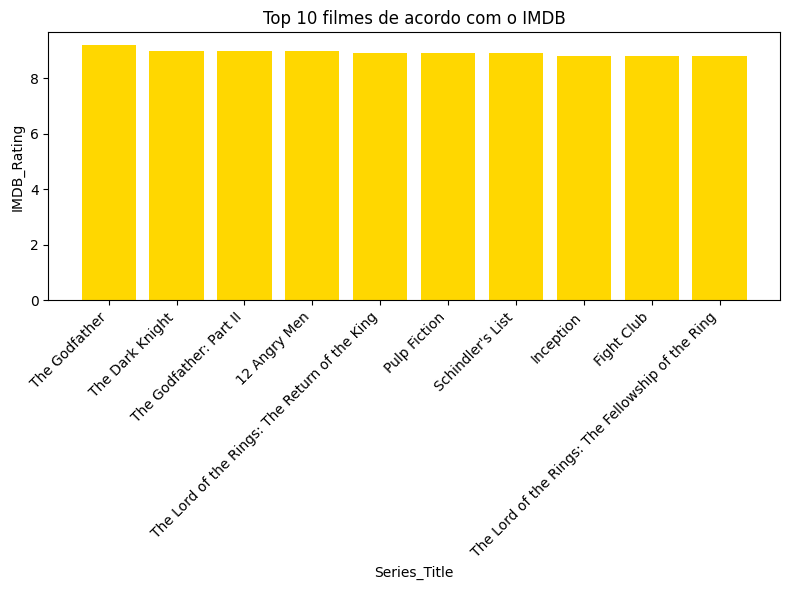

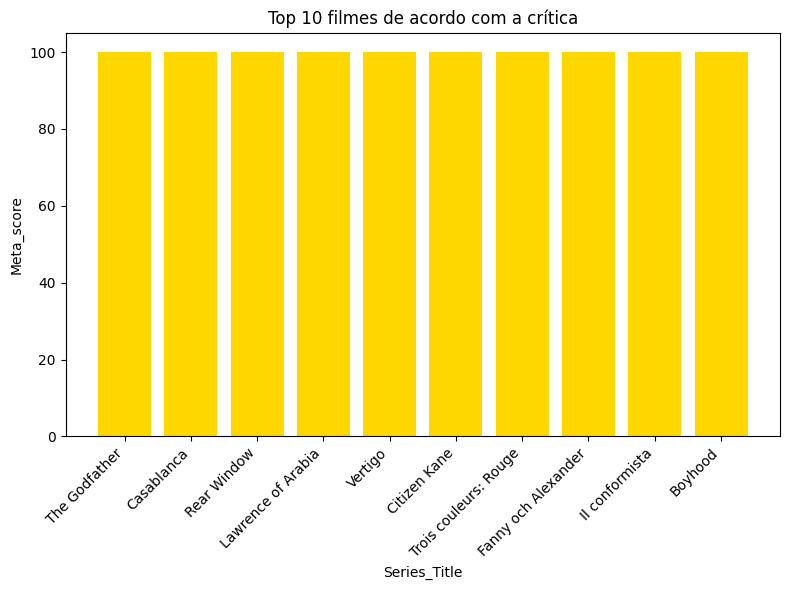

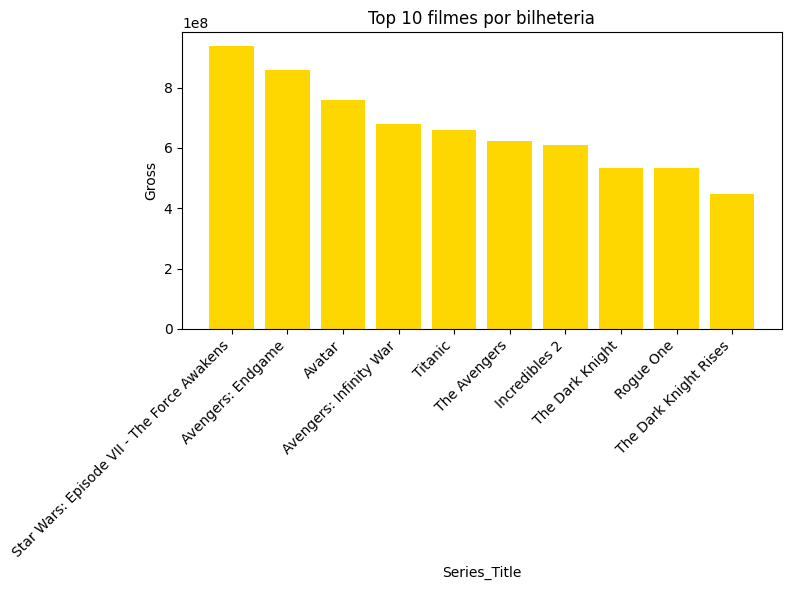

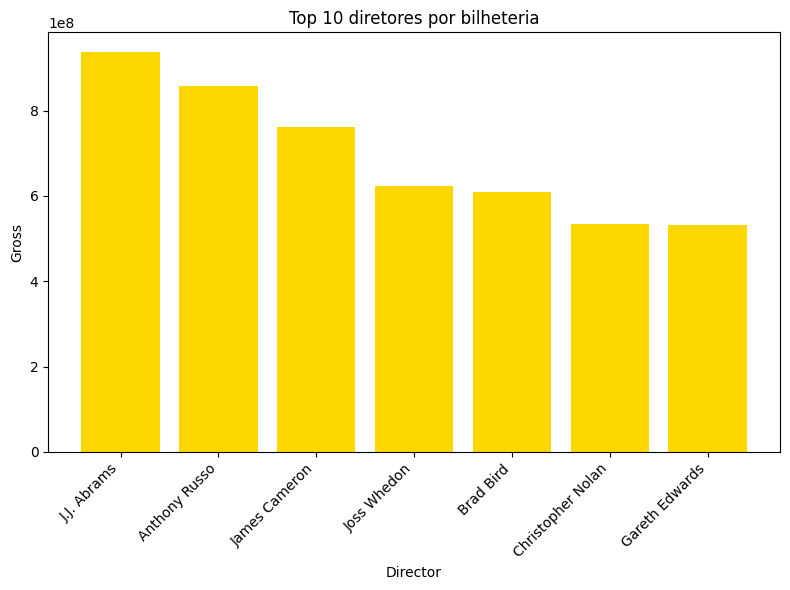

In [88]:
def plot_top10(dataset, colunaX, colunaY, titulo):
    plt.figure(figsize=(8, 6))
    plt.bar(dataset[colunaX], dataset[colunaY], color='gold')
    plt.xlabel(colunaX)
    plt.ylabel(colunaY)
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    

top10_imdb = df.head(10) # df já está ordenado
top10_metaScore = df.nlargest(10, 'Meta_score')
top10_gross = df.nlargest(10, 'Gross')
top10_dir = df.nlargest(10,'Gross')


plot_top10(top10_imdb,'Series_Title', 'IMDB_Rating','Top 10 filmes de acordo com o IMDB')
plot_top10(top10_metaScore,'Series_Title', 'Meta_score','Top 10 filmes de acordo com a crítica')
plot_top10(top10_gross,'Series_Title', 'Gross', 'Top 10 filmes por bilheteria')
plot_top10(top10_gross,'Director', 'Gross', 'Top 10 diretores por bilheteria')



Duração dos filmes

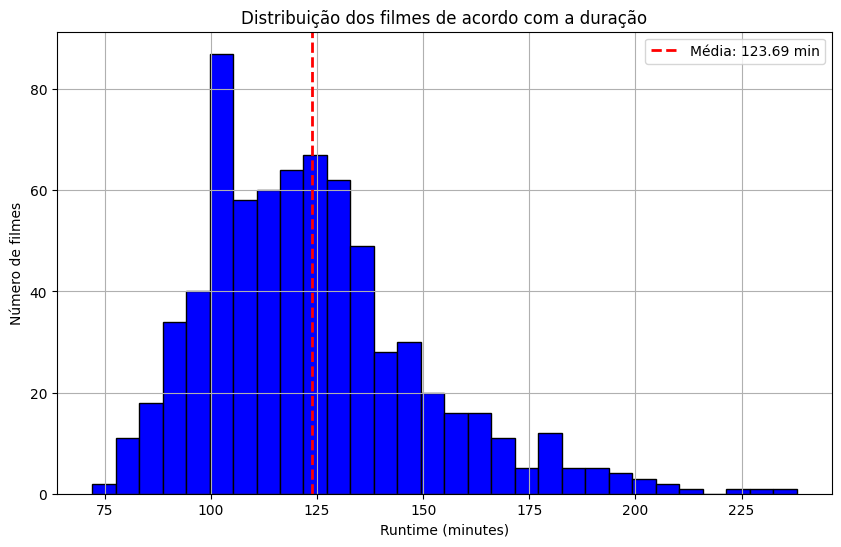

In [89]:
mean_runtime = df['Runtime'].mean()

plt.figure(figsize=(10, 6))
plt.hist(df['Runtime'], bins=30, color='blue', edgecolor='black')
plt.axvline(mean_runtime, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_runtime:.2f} min')
plt.title('Distribuição dos filmes de acordo com a duração')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Número de filmes')
plt.legend()
plt.grid(True)
plt.show()

2.a) - Para se recomendar um filme a uma pessoa desconhecida, as características mais interessantes que considero são 3: a nota do IMDb, a Metascore e o número de votos. Todos aqueles que possuírem um valor maior que a média nesses três aspectos são potenciais recomendações.

In [90]:
imdb_limiar = df['IMDB_Rating'].mean().round(1)

print("Nota limiar:",imdb_limiar) 
print("Filmes com notas <",imdb_limiar," -> filmes com notas mais baixas")
print("Filmes com notas >=",imdb_limiar," -> filmes com notas mais altas")

Nota limiar: 7.9
Filmes com notas < 7.9  -> filmes com notas mais baixas
Filmes com notas >= 7.9  -> filmes com notas mais altas


In [91]:
ms_limiar = df['Meta_score'].mean().round(1)

print("Meta Score limiar:",ms_limiar) 

Meta Score limiar: 77.2


In [92]:
num_votes_limiar = df['No_of_Votes'].mean().round(1)

print("Número de votos limiar:",num_votes_limiar) 

Número de votos limiar: 353348.0


In [93]:
filmes_recomendados = df[(df['IMDB_Rating'] >= imdb_limiar) & (df['Meta_score'] >= ms_limiar) & (df['No_of_Votes']>= num_votes_limiar)]

filmes_recomendados

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,Adult,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
1,2,The Dark Knight,2008,Adult,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
2,3,The Godfather: Part II,1974,Adult,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
3,4,12 Angry Men,1957,Free,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
4,5,The Lord of the Rings: The Return of the King,2003,Free,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,Iron Man,2008,Adult,126,"Action, Adventure, Sci-Fi",7.9,"After being held captive in an Afghan cave, bi...",79.0,Jon Favreau,Robert Downey Jr.,Gwyneth Paltrow,Terrence Howard,Jeff Bridges,939644,318412101
504,505,Mystic River,2003,Adult,138,"Crime, Drama, Mystery",7.9,The lives of three men who were childhood frie...,84.0,Clint Eastwood,Sean Penn,Tim Robbins,Kevin Bacon,Emmy Rossum,419420,90135191
505,506,Harry Potter and the Prisoner of Azkaban,2004,Free,142,"Adventure, Family, Fantasy",7.9,"Harry Potter, Ron and Hermione return to Hogwa...",82.0,Alfonso Cuarón,Daniel Radcliffe,Emma Watson,Rupert Grint,Richard Griffiths,552493,249358727
512,513,Children of Men,2006,Adult,109,"Adventure, Drama, Sci-Fi",7.9,"In 2027, in a chaotic world in which women hav...",84.0,Alfonso Cuarón,Julianne Moore,Clive Owen,Chiwetel Ejiofor,Michael Caine,465113,35552383


  -> Recomendaria qualquer um desses 109 filmes, considerando todo o dataset.

2.b) Principais fatores que estão relacionados com a alta expectativa de faturamenton (Gross) de um filme?

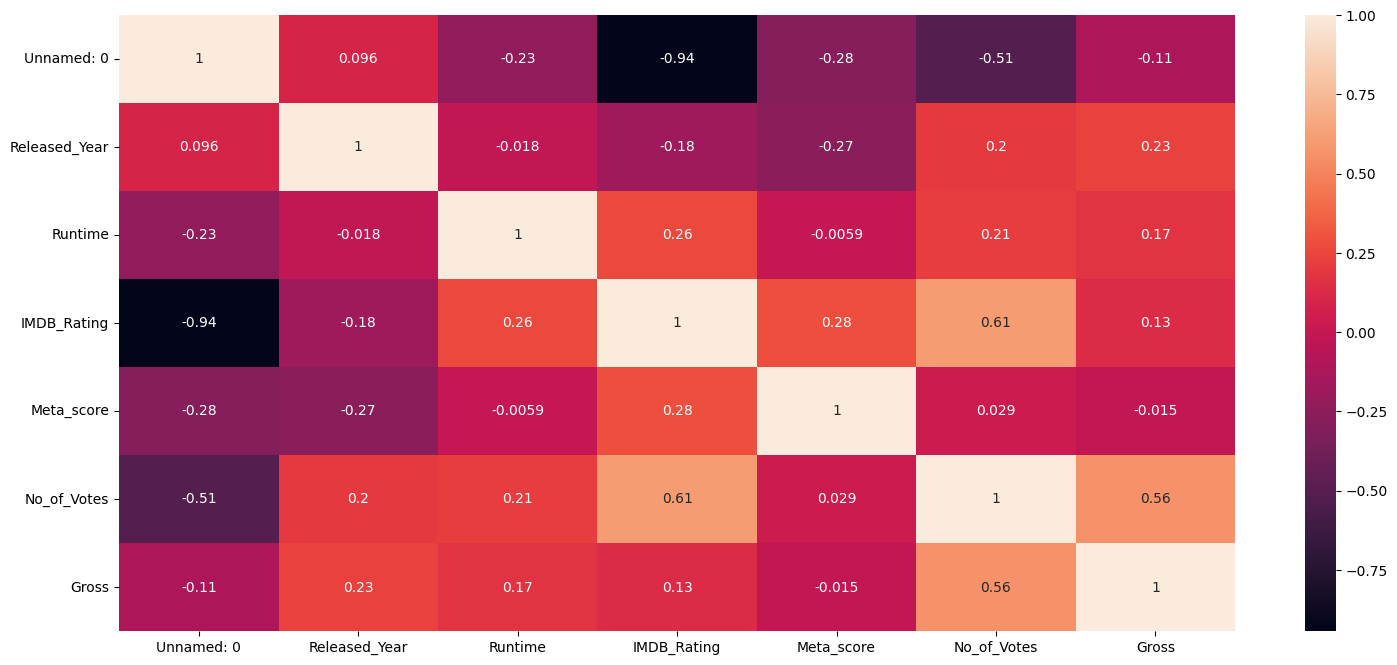

In [94]:
plt.rcParams["figure.figsize"]=(18,8)
ax = sns.heatmap(df.corr(numeric_only=True), annot=True)

  -> A maior correlação com a alta expectativa de faturamento (correlação positiva) é o número de votos que esse filme recebeu. Em seguida, mas com bem menos expressividade, o ano de lançamento e a nota do imdb (a nota dos críticos mostrou-se ainda menos relevante).

2.c) É possível inferir o gênero do filme pela coluna Overview?

In [95]:
delimitadores = r"[,\s]+" #separar tanto por espaço quanto por vírgula

qtd_por_genero = Counter(re.split(delimitadores, " ".join(df['Genre'])))

In [96]:
#Criando um dicionário para armazenar os gêneros e cada overview recionada a eles.
genero_overviews = {} 

for index, row in df.iterrows():
    generos = row['Genre'].split(', ')  # Divide os gêneros em uma lista
   # print(generos)
    overview = row['Overview']

    for genero in generos:
        if genero not in genero_overviews:
            genero_overviews[genero] = []  # Inicializa a lista para o gênero

        genero_overviews[genero].append(overview)  

#genero_overviews

In [97]:
#!pip install nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


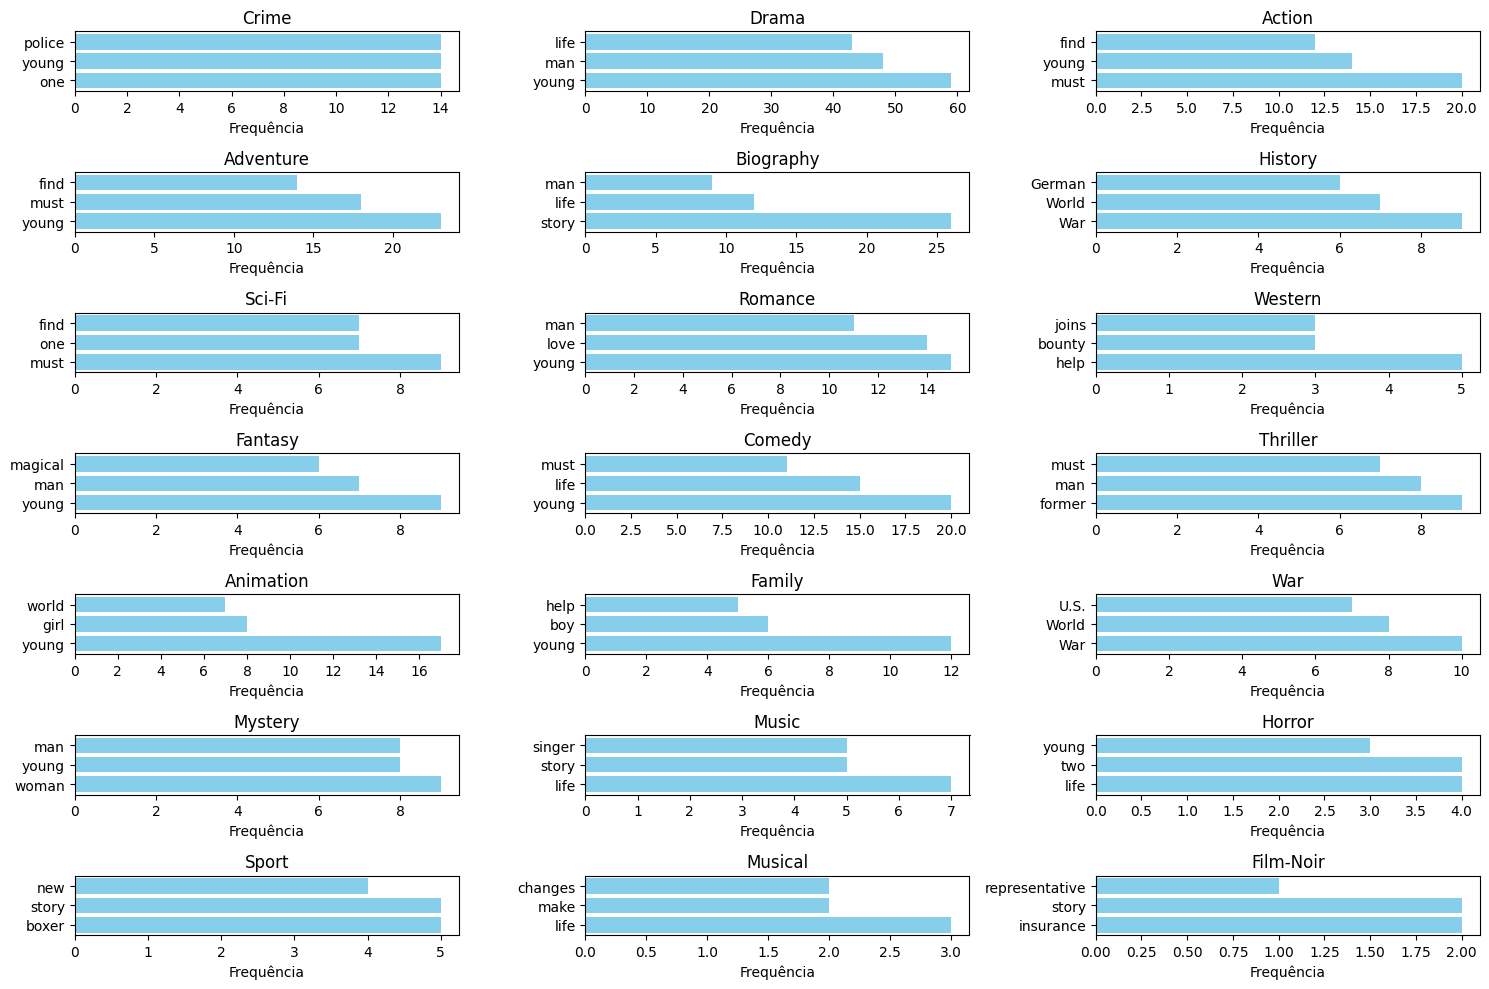

In [98]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

top_palavras_por_genero = {}


for genero, overviews in genero_overviews.items():
    # Concatenando todos os overviews do gênero em uma única string
    string = ' '.join(overviews)
    
    # Removendo as stopwords
    filtered_text = ' '.join([word for word in string.split() if word.lower() not in stop_words])
    
    freq_palavra = Counter(filtered_text.split())
    
    top3_palavras = freq_palavra.most_common(3)

    top_palavras_por_genero[genero] = top3_palavras

# Calcular o número de subplots necessários
num_plots = len(top_palavras_por_genero)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols)

plt.figure(figsize=(15, 10))

for i, (genero, top3_palavras) in enumerate(top_palavras_por_genero.items()):
    words, counts = zip(*top3_palavras)
    plt.subplot(num_rows, num_cols, i+1)
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequência')
    plt.title(genero)

plt.tight_layout()
plt.show()


-->Talvez seja possível inferir o gênero de filmes de Crime, Musical, História e Guerra, por exemplo, pois são os que apresentam palavras mais caracterísitcas.

3.Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de
performance do modelo foi escolhida e por quê?

--> O problema em questão trata-se de um problema de regressão, pois estamos lidando com notas, ou seja, valores numéricos com grande possibilidade de variação. Observando o gráfico de correlação entre as variáveis, já apresentado anteriormente, pode-se perceber que os fatores que mais influenciam a nota do imdb são, respectivamente, o número de votos, a nota dos críticos e a duração do filme. Dessa forma, a fim de simplificar o processo, resolvi trabalhar apenas com essas três colunas para construir o modelo de aprendizado de máquina.

--> Os modelos utilizados foram LinearRegression, DecisionTreeRegressor e RandomForestRegressor.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def treinar_e_avaliar_modelo(df, colunas_relevantes, coluna_alvo, modelo):
    X = df[colunas_relevantes]
    y = df[coluna_alvo]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    
    # Previsões
    #print(y_pred)
    
    return mse

colunas_relevantes = ['No_of_Votes', 'Meta_score', 'Runtime']
coluna_alvo = 'IMDB_Rating'

mse_linear = treinar_e_avaliar_modelo(df, colunas_relevantes, coluna_alvo, LinearRegression())

mse_decision_tree = treinar_e_avaliar_modelo(df, colunas_relevantes, coluna_alvo, DecisionTreeRegressor(random_state=42))

mse_random_forest = treinar_e_avaliar_modelo(df, colunas_relevantes, coluna_alvo, RandomForestRegressor(n_estimators=100, random_state=42))

print("\n", mse_linear, mse_decision_tree, mse_random_forest)



 0.04855786361936467 0.07111888111888116 0.04864605594405557


--> O modelo que melhou previu os resultados foi o LinearRegression, seguido do RandomForestRegressor e logo após, do DecisionTreeClassifier.

--> Pontos positivos do LinearRegression é que trata-se de um modelo mais fácil e de treinar e é menos propenso a overfitting. Já um ponto negativo é que pode ser muito sensível a outliers.

--> Foi escolhida como métrica de avaliação dos modelos o "Erro Quadrado Médio" (MSE, em inglês) por ser fácil de calcular e interpretar. Basicamente é a média dos quadrados dos erros, em que o erro é a diferença entre o valor previsto e o valor real. É interessante perceber que o MSE penaliza erros grandes mais severamente do que erros pequenos porque os erros são elevados ao quadrado.

4. e 5. Salvando o modelo em formato .pkl e com ele prevendo a de nota de filme que originalmente não está no dataset.

--> Por ser o que se saiu melhor, o modelo salvo no formato .pkl foi o utilizando LinearRegression

In [100]:
#LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

colunas_relevantes = ['No_of_Votes', 'Meta_score', 'Runtime']
X = df[colunas_relevantes]
y = df['IMDB_Rating'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.04855786361936467


In [101]:
modelo_carregado = joblib.load('modelo_linear_regression.pkl')

# Dados do novo filme
novo_filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

novo_filme['Runtime'] = int(novo_filme['Runtime'].split()[0])

df_novo_filme = pd.DataFrame([{
    'No_of_Votes': novo_filme['No_of_Votes'],
    'Meta_score': novo_filme['Meta_score'],
    'Runtime': novo_filme['Runtime']
}])

predicao = modelo_carregado.predict(df_novo_filme)

print(f'A previsão da avaliação IMDB para o filme "{novo_filme["Series_Title"]}" é: {predicao[0]}')

A previsão da avaliação IMDB para o filme "The Shawshank Redemption" é: 8.882999999999997
